In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [45]:
df= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [46]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [47]:
numerical = df.select_dtypes(int)

In [48]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [49]:
categoricals = df.select_dtypes(object)


## Activity 6

### One Hot/Label Encoding of the categorical variables in the categoricals data frame

I am goind to delete "effective_to_date" because it doesn't make sense to make dummies from every date. In addition we already have a "Month" column.

#### Which one are ordinals? 
As we have some columns with an order, we want to change it manually

#### Which one are nominals? 

Just use get dummies, as we don't need an order

### Remove the outliers from the numerical columns

### check if there are highly correlated features and drop them if there are any.

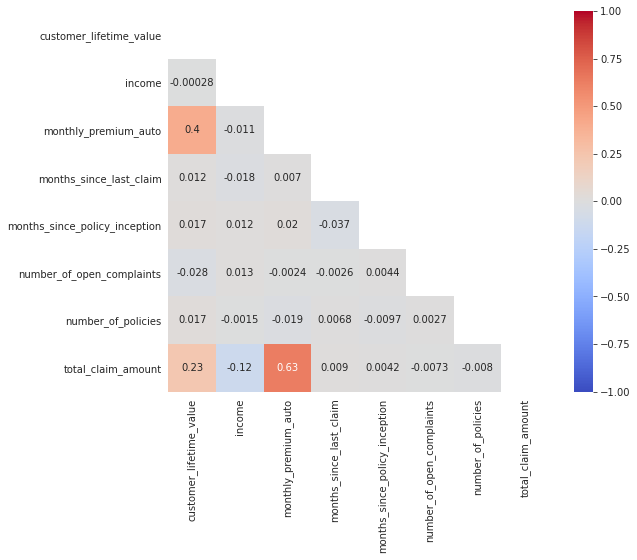

In [50]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### X-y split (y is the target variable which is the total claim amount)

<b>Data Splitting: for now we are going tp use only numerical

In [51]:
X = numerical.drop("total_claim_amount", axis=1)
y = numerical["total_claim_amount"]

## Activity 7

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### ALL THE TRANSFORMATIONS HAS TO BEEN DONE AFTER THE SPLITTING AND APPLIED TO A NEW X_TRAIN CALLED X_TRAIN_SCALED OR X_TRAIN_TRANSFORMATION OR WHATEVER

<b>First transformation: Standarize the data

In [53]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [54]:
X_train_scaled

array([[-0.11021627, -1.2632667 , -0.67143823, ...,  1.36516733,
        -0.42619497, -0.40381143],
       [-0.42794064, -1.36853038, -0.72925469, ...,  1.68786198,
        -0.42619497,  0.84759702],
       [-0.5223013 ,  0.26299646,  0.48489091, ...,  0.50464827,
        -0.42619497, -0.82094758],
       ...,
       [-0.81132612, -1.16342071, -0.90270406, ..., -1.39566466,
        -0.42619497, -0.82094758],
       [ 2.25575772,  0.97656622, -0.78707115, ..., -1.61079442,
        -0.42619497, -0.40381143],
       [ 1.18923585, -0.01438919, -0.55580532, ...,  0.21780858,
         1.77676929, -0.40381143]])

In [55]:
X_train_scaled.shape

(7482, 7)

In [56]:
X_test_scaled

array([[-0.40967729, -0.94647238, -0.61362178, ...,  1.54444214,
        -0.42619497,  2.51614162],
       [-0.7597249 , -0.93254692, -0.64253   , ...,  0.755633  ,
         0.67528716, -0.82094758],
       [ 0.57248529, -1.22437973, -0.90270406, ...,  0.39708339,
        -0.42619497, -0.40381143],
       ...,
       [-0.79857077,  0.60844433, -0.58471355, ..., -1.18053489,
        -0.42619497, -0.82094758],
       [-0.42547654, -0.96649777, -0.81597938, ..., -1.61079442,
         0.67528716,  0.43046087],
       [-0.49881985, -0.94988352,  0.71615674, ..., -1.00126009,
        -0.42619497, -0.82094758]])

<b>Second transformation: Power transformer to get a normal distribution

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

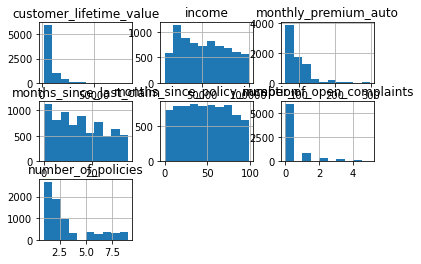

In [57]:
X_train.hist()

In [58]:
power=PowerTransformer().fit(X_train_scaled)   ##. finding the parameters ( mean, variance from the training set )

In [59]:
power= PowerTransformer()
power.fit(X_train_scaled)
X_train_trans = power.transform(X_train_scaled)
X_test_trans = power.transform(X_test_scaled)

<b> Apply linear regression

In [60]:
model=LinearRegression()    # model
model.fit(X_train_trans, y_train)   # model train

LinearRegression()

<b> model parameters  (b1,b2,b3,b4,b5,b6,b7)

In [61]:
model.coef_

array([ -2.43460496, -34.73411728, 162.83501658,   3.41611509,
         0.99248972,  -0.48114407,  -2.67803357])

In [62]:
model.intercept_

433.0597433841219

<b> Making predictions

We make predictions (y_pred) using X_test_scaled

In [63]:
y_pred=model.predict(X_test_trans)   # model prediction

y_pred_train=model.predict(X_train_trans)

In [64]:
y_pred.shape

(3207,)

In [65]:
y_pred_train.shape

(7482,)

In [66]:
y.shape

(10689,)

### Model evaluation

In [67]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [68]:
y_pred.shape   #same shape as y_test

(3207,)

In [69]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
4665,345,356.252614
4072,345,356.690713
4549,257,243.530655
4211,445,300.359104
3081,523,592.573449
...,...,...
3488,404,306.854519
1667,554,401.866035
1516,350,320.735258
10215,27,276.237867


### Analizing the model. What kind of plot you will get if all the all the predictions are ok? A stright line

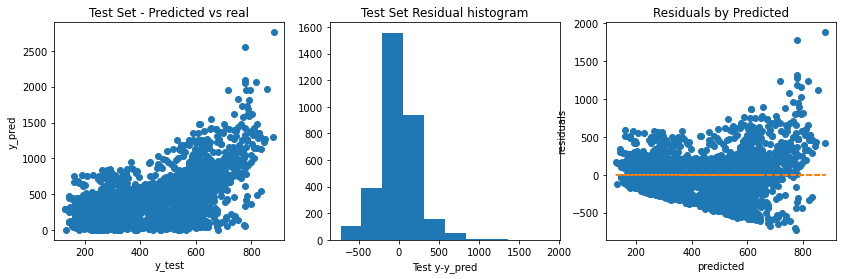

In [70]:
# Make an scatter plot y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [71]:
# first plot: checking linearity
# second plot: checking normality of residuals. It is a normal distribution, and the majority of residuals are close to 0. good! 
# --> No over or under estimation
# third plot: checking homoscedasticity. No constance variance. Predictions are very bad

### Model evaluation

In [72]:
print ("MSE is " + str(mse(y_test,y_pred)))
print ("RMSE is " + str(mse(y_test,y_pred,squared=False)))
print ("Mean absolute error - MAE - is " + str(mae(y_test,y_pred)))

MSE is 56638.58973971505
RMSE is 237.9886336355479
Mean absolute error - MAE - is 166.23492006176943


In [73]:
R2 = r2_score(y_test,y_pred)
R2

0.3210025396056351

- Adjusted r2

In [74]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3195167683575073

### Evaluate error metrics also on train test

- If error_train very high -> Underfitting ( consider other model or to  add more variables)
- If error_train <= error_test -> Ok
- If error_train very small and <<<< error_test -> Overfitting!!!! ( you overtrained your model  or you did not applied the transformer to the test set ).


In [75]:
R2_test=model.score(X_test_trans,y_test)
R2_train=model.score(X_train_trans,y_train)

In [76]:
R2_test, R2_train   #OK

(0.3210025396056351, 0.31583200773801334)

### Feature importance
- In order to check which independent features are more relevant to your model, compare the absolute value of each coefficient.

In [77]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [78]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,162.835017
1,income,34.734117
3,months_since_last_claim,3.416115
6,number_of_policies,2.678034
0,customer_lifetime_value,2.434605
4,months_since_policy_inception,0.992490
5,number_of_open_complaints,0.481144


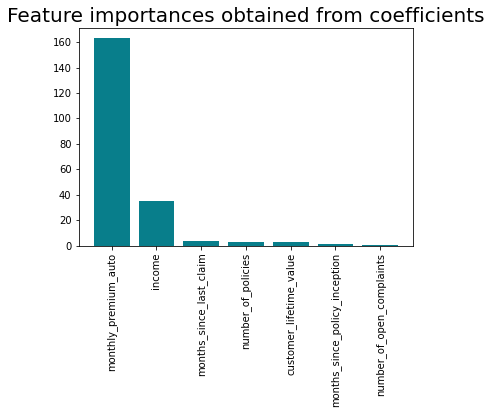

In [79]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

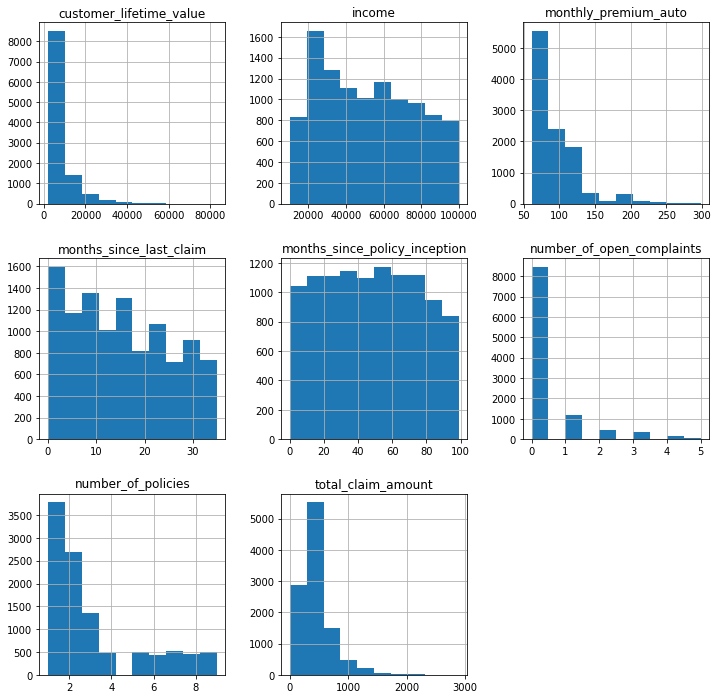

In [80]:
numerical.hist(figsize=(12,12))